# Exploratory Analysis on Chess Openings
This goal of this kernel is to graphically visualize the LiChess Game Collection Dataset which contains over 20,000 individual chess matches and includes columns about the winner, Elo ratings, and opening played in each game. 

Table of Contents: <br>
&emsp; [1. Introduction](#Intro) <br>
&emsp; [2. Exploring Openings](#Open) <br>
&emsp; &emsp; [2.1 Most Common Openings](#Comm) <br>
&emsp; &emsp; [2.1 Win Rates By Openings](#WR_Open) <br>
&emsp; [3. Win Rates By Elo Difference](#WR_by_Diffs) <br>
&emsp; &emsp; [3.1 Matches With Small Elo Differences](#Small) <br>
&emsp; &emsp; [3.2 Matches With Medium Elo Differences](#Med) <br>
&emsp; &emsp; [3.3 Matches With Large Elo Differences](#Large) <br>
&emsp; &emsp; [3.4 Matches With Very Large Elo Differences](#VLarge) <br>
&emsp; &emsp; [3.4 All Together](#All) <br>
&emsp; [4. Common Openings By Elo Group](#Open_Elo) <br>

<a id='Intro'></a>
# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML

df = pd.read_csv("games.csv")

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

We begin by viewing the first 3 instances of the dataset to view what variables are available and observe how they are structured.

In [3]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


Next we will view the counts and datatypes of each variable.

In [4]:
df.count()

id                20058
rated             20058
created_at        20058
last_move_at      20058
turns             20058
victory_status    20058
winner            20058
increment_code    20058
white_id          20058
white_rating      20058
black_id          20058
black_rating      20058
moves             20058
opening_eco       20058
opening_name      20058
opening_ply       20058
dtype: int64

Since the counts are all the same, this indicates there are no missing values, since NA values would decrease the variable count.

In [5]:
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

Since all datatypes appear to be correct, no further cleaning is required. We will begin our analysis in the next section.

<a id='Open'></a>
# Exploring openings

<a id='Comm'></a>
### Most common openings

In [6]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                       368
Sicilian Defense                                           358
Sicilian Defense: Bowdler Attack                           296
Scotch Game                                                271
French Defense: Knight Variation                           271
                                                          ... 
Russian Game: Modern Attack                                  1
Ruy Lopez: Classical Variation |  Modern Main Line           1
Bishop's Opening: Warsaw Gambit                              1
French Defense: Rubinstein Variation |  Kasparov Attack      1
Sicilian Defense: Pin Variation |  Koch Variation            1
Name: opening_name, Length: 1477, dtype: int64

In [7]:
tab = df.groupby('opening_name')
counts = tab['opening_name'].count()

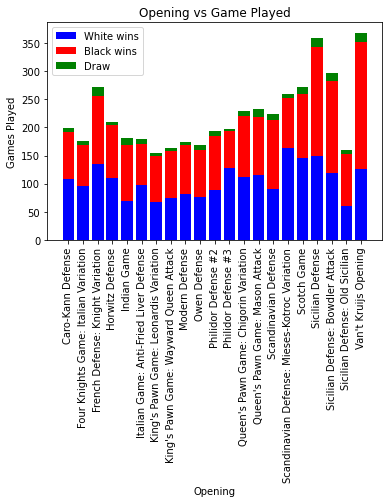

In [8]:
df1 = df[df['winner']=='white']
df2 = df[df['winner']=='black']
df3 = df[df['winner']=='draw']

tab1 = df1.groupby('opening_name')
counts1 = tab1['opening_name'].count()
counts1 = counts1[counts>150]
labs1 = counts1.index

tab2 = df2.groupby('opening_name')
counts2 = tab2['opening_name'].count()
counts2 = counts2[counts>150]
labs2 = counts2.index

tab3 = df3.groupby('opening_name')
counts3 = tab3['opening_name'].count()
counts3 = counts3[counts>150]
labs3 = counts3.index

plt.bar(labs1,counts1,color = 'b',label = 'White wins')
plt.bar(labs2,counts2,bottom = counts1,color = 'r',label = 'Black wins')
plt.bar(labs3,counts3,bottom = (np.array(counts1)+np.array(counts2)),color = 'g',label = 'Draw')
plt.xlabel('Opening')
plt.ylabel('Games Played')
plt.title('Opening vs Game Played')
plt.xticks(rotation = 90)
plt.legend()

We observe that the Van't Kruijs Opening and the Sicilian Defense are the two most played openings in online chess, with well over 300 games played in each opening. 

<a id='WR_Open'></a>
### Win Rates By Opening

In this section, we are interested in observing the highest winrate openings for both the White and Black pieces. We will only include openings from our dataset that have had at least 20 games played.

In [9]:
df['W_Win'] = np.where(df['winner']=='white',1,0)
df['B_Win'] = np.where(df['winner']=='black',1,0)
df['Draw'] = np.where(df['winner']=='draw',1,0)

In [29]:
W_Sum = df.groupby('opening_name').sum().loc[df.groupby('opening_name').size()>20,'W_Win']
W_Count = df.groupby('opening_name').size().loc[df.groupby('opening_name').size()>20]
W_winrate = W_Sum/W_Count
W_winrate.sort_values(ascending = False)

opening_name
Russian Game: Damiano Variation                                     0.800000
Sicilian Defense: Open                                              0.791667
Nimzowitsch Defense: Scandinavian Variation |  Advance Variation    0.791667
Pirc Defense #5                                                     0.744186
King's Gambit Accepted |  MacLeod Defense                           0.730769
                                                                      ...   
Sicilian Defense: Modern Variations |  Main Line                    0.300000
Sicilian Defense: Paulsen Variation                                 0.259259
King's Pawn Game                                                    0.250000
Kadas Opening                                                       0.206897
Grob Opening                                                        0.206897
Length: 220, dtype: float64

We observe that the openings where White has the highest winrate are the Russian Game: Damiano Variation, and the Open Sicilian Defense.

In [30]:
B_Sum = df.groupby('opening_name').sum().loc[df.groupby('opening_name').size()>20,'B_Win']
B_Count = df.groupby('opening_name').size().loc[df.groupby('opening_name').size()>20]
B_winrate = B_Sum/B_Count
B_winrate.sort_values(ascending = False)

opening_name
Grob Opening                                                        0.724138
Kadas Opening                                                       0.724138
King's Pawn Game                                                    0.714286
Sicilian Defense: Modern Variations |  Main Line                    0.700000
Mieses Opening: Reversed Rat                                        0.692308
                                                                      ...   
Zukertort Opening: Queen's Gambit Invitation                        0.245283
Pirc Defense #5                                                     0.232558
Russian Game: Damiano Variation                                     0.200000
Sicilian Defense: Open                                              0.166667
Nimzowitsch Defense: Scandinavian Variation |  Advance Variation    0.166667
Length: 220, dtype: float64

We observe that the 2 openings in which Black has the highest winrate are the Grob and Kadas Openings. These openings are infamous for placing White at a disadvantage because they sacrifice priority over the center squares.

In [32]:
D_Sum = df.groupby('opening_name').sum().loc[df.groupby('opening_name').size()>20,'Draw']
D_Count = df.groupby('opening_name').size().loc[df.groupby('opening_name').size()>20]
Draw_rate = D_Sum/D_Count
Draw_rate.sort_values(ascending = False)

opening_name
Zukertort Opening: Kingside Fianchetto         0.291667
Benoni Defense: Benoni Gambit Accepted         0.272727
Semi-Slav Defense                              0.212121
Reti Opening                                   0.142857
Trompowsky Attack                              0.136364
                                                 ...   
English Opening: Anglo-Scandinavian Defense    0.000000
English Opening: Anglo-Indian Defense          0.000000
Sicilian Defense: Hyperaccelerated Dragon      0.000000
Saragossa Opening                              0.000000
English Opening                                0.000000
Length: 220, dtype: float64

<a id='WR_by_Diffs'></a>
# Win Rates By Elo Differences
A player's Elo is their skill rating calculated relative to all other players. The higher your Elo rating is, the better you are at the game compared to other players. In chess, Elo ratings typically fall between 600-3000. In this section we are interested in the effects of Elo differences between chess players on match outcomes. Are players more likely to win if their Elo rating is higher? If so, by how much?

In [13]:
#Calculate the absolute difference between player ratings
df['Elo_diff'] = np.abs(df['white_rating']-df['black_rating'])
#Calculate which player has the higher Elo
df['Higher_elo'] = np.where(df['white_rating'] > df['black_rating'],'white','black')
#Set exactly equal player ratings equal to 'same'
df.loc[df['Elo_diff']==0,'Higher_elo'] = 'same'
#Create a variable which specifies whether the higher Elo player won the game
df['Higher_wins'] = np.where(df['Higher_elo']==df['winner'],True,False)

We visualize the created variables in the dataframe below:

In [14]:
df.iloc[:,[-2,-3,6,-1]].head()

,Higher_elo,Elo_diff,winner,Higher_wins
0,white,309,white,True
1,white,61,black,False
2,black,4,white,False
3,black,15,white,False
4,white,54,white,True


<a id='Small'></a>
### Matches with small differences in Elo rating (0-49 point difference between Elo ratings)

In [15]:
len(df.loc[df['Elo_diff']<50])

5383

The number of matches in this category is 5383.

In [16]:
Small_diff_winrate = np.sum(df.loc[df['Elo_diff']<50,'Higher_wins'])/len(df.loc[df['Elo_diff']<50])
Small_diff_winrate

0.4703696823332714

The proportion of games where the higher Elo player has won is .488 or 48.8%. Indicating in matches where Elo is very close, having a higher Elo is not predictive of a higher match win-rate.

<a id='Med'></a>
### Matches with medium differences in Elo rating (50-149 point difference between Elo ratings)

In [17]:
len(df.loc[(df['Elo_diff']>=50)&(df['Elo_diff']<150)])

6391

There are 6391 matches in this category.

In [18]:
Med_diff_winrate = np.sum(df.loc[(df['Elo_diff']>=50)&(df['Elo_diff']<150),'Higher_wins'])/len(df.loc[(df['Elo_diff']>=50)&(df['Elo_diff']<150)])
Med_diff_winrate

0.5764356125801909

The proportion of games where the higher Elo player has won is .576 or 57.6%.

<a id='Large'></a>
### Matches with large differences in Elo rating (150-299 point difference between Elo ratings)

In [19]:
len(df.loc[(df['Elo_diff']>=150)&(df['Elo_diff']<300)])

4609

There are 4609 matches in this category.

In [20]:
Large_diff_winrate = np.sum(df.loc[(df['Elo_diff']>=150)&(df['Elo_diff']<300),'Higher_wins'])/len(df.loc[(df['Elo_diff']>=150)&(df['Elo_diff']<300)])
Large_diff_winrate

0.685181167281406

The proportion of games where the higher Elo player has won is .685 or 68.5%.

<a id='VLarge'></a>
### Matches with very larges differences in Elo rating (300+ point difference between Elo ratings)

In [21]:
len(df.loc[df['Elo_diff']>=300])

3675

There are 3675 matches in this category.

In [22]:
Largest_diff_winrate = np.sum(df.loc[df['Elo_diff']>=300,'Higher_wins'])/len(df.loc[df['Elo_diff']>=300])
Largest_diff_winrate

0.8103401360544218

The proportion of games where the higher Elo player has won is .81 or 81.0%.

<a id='All'></a>
### All together
We will visualize all these elo differences together through a barplot:

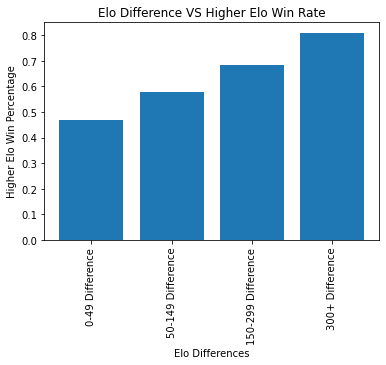

In [23]:
elo_names = ['0-49 Difference', '50-149 Difference', '150-299 Difference', '300+ Difference']
elo = [Small_diff_winrate, Med_diff_winrate, Large_diff_winrate, Largest_diff_winrate]
plt.bar(elo_names, elo)
plt.xlabel('Elo Differences')
plt.ylabel('Higher Elo Win Percentage')
plt.title('Elo Difference VS Higher Elo Win Rate')
plt.xticks(rotation = 90)
plt.show()

<a id='Open_Elo'></a>
# Common Openings By Elo Groups
We will now explore which openings are most common depending on elo level. We will separate Elo level into 4 categories specified below:
* 0-1300 Average Elo
* 1300-1599 Average Elo
* 1600-1900 Average Elo
* 1900+ Average Elo 
<br>

Where average Elo is defined as the average Elo value between both players in each game.

In [24]:
df["Avg_Elo"] = (df['white_rating']+df['black_rating'])/2

In [25]:
df.loc[(df['Avg_Elo']>=0)&(df['Avg_Elo']<1300),'opening_name'].value_counts()[:10]

Van't Kruijs Opening                             133
Scandinavian Defense                              90
King's Pawn Game: Wayward Queen Attack            56
Queen's Pawn Game: Chigorin Variation             47
Scandinavian Defense: Mieses-Kotroc Variation     46
Four Knights Game: Italian Variation              43
King's Pawn Game: Leonardis Variation             42
Sicilian Defense                                  40
Philidor Defense #2                               35
Horwitz Defense                                   34
Name: opening_name, dtype: int64

In [26]:
df.loc[(df['Avg_Elo']>=1300)&(df['Avg_Elo']<1600),'opening_name'].value_counts()[:10]

Van't Kruijs Opening                             177
Sicilian Defense                                 173
Scotch Game                                      165
Sicilian Defense: Bowdler Attack                 144
Scandinavian Defense: Mieses-Kotroc Variation    128
Philidor Defense #2                              120
Philidor Defense #3                              118
French Defense: Knight Variation                 114
Queen's Pawn Game: Chigorin Variation            105
Scandinavian Defense                             101
Name: opening_name, dtype: int64

In [27]:
df.loc[(df['Avg_Elo']>=1600)&(df['Avg_Elo']<1900),'opening_name'].value_counts()[:10]

Sicilian Defense                                 121
Sicilian Defense: Bowdler Attack                 113
French Defense: Knight Variation                 107
Queen's Pawn Game: Mason Attack                   96
Indian Game                                       72
Horwitz Defense                                   71
Sicilian Defense: Old Sicilian                    68
Italian Game: Anti-Fried Liver Defense            68
Scandinavian Defense: Mieses-Kotroc Variation     68
Scotch Game                                       67
Name: opening_name, dtype: int64

In [28]:
df.loc[df['Avg_Elo']>=1900,'opening_name'].value_counts()[:10]

Indian Game                              43
Sicilian Defense: Old Sicilian           28
Queen's Pawn Game: Mason Attack          26
Sicilian Defense                         24
French Defense: Exchange Variation       23
Queen's Pawn Game: London System         21
Sicilian Defense: Najdorf Variation      20
Horwitz Defense                          19
Caro-Kann Defense: Exchange Variation    19
Caro-Kann Defense                        18
Name: opening_name, dtype: int64

We observe that in the lower Elo groups (0-1299 and 1300-1599 groups), the Van't Kruijs opening is the highest played opening. However, this opening does not even make the top 10 in the two higher Elo groups. Furthermore, openings such as the Scandinavian opening and Philidor Defense are also commonly played in lower Elos but not in higher ones, based on our data.

On the other hand, we observe that in the highest elo games (1900+ group), the Indian Opening and Old Sicilian Defense are most popular. Furthermore, openings such as the Najdorf, London System, and variations of the Caro-Kann defense are frequently played in the highest Elo games, but were not common openings in any other Elo group.